# Project: No Show Hospital Appointments Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset I am about to analyze contains information about Brazil medical appointments and is concerned about whether or not patients show up for their appointment. 

> The main idea of the dataset is to identify the factors responsible for whether patients show-up or not. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Possible questions
> What are the main factors that control whether patients show-up to their appointments or not?
>> 1) Does age has an effect?
>>
>> 2) Does the scholarship affect people to or not attend appointments?
>>> **About the scholarship:** Bolsa Família was a social welfare program of the Government of Brazil. Bolsa Família provided financial aid to poor Brazilian families. In order to be eligible, families had to ensure that children attend school and get vaccinated. If they exceeded the total of permitted school absences, they were dropped from the program and their funds were suspended.
>>
>> 3) Does sending patients a reminder (SMS message) of the appointments affect the rate of show-up?
>>
>> 4) Is the place/region where the appointment takes place a factor?

<a id='wrangling'></a>
## Data Wrangling

### General Properties

### Step #1 
> Load up the data, and printed 1st few lines to have a general idea of the data.

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Brainstorming:**
> 1st thought to come to mind that since the data has relations with Brazil, there might be some words written in a foriegn language. 

### Step #2
> Get information about number of columns & rows.

In [3]:
df.shape

(110527, 14)

### Step #3
> Print information about columns, null values, data type of each column.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Note
> When comparing the number of rows in **Step #2** and non-null values of each column in **Step #3**, we realize that there's no *null (empty)* values.

> Let's check

In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### Step #4
> Check for **duplicates**.

In [6]:
df.duplicated().sum()

0

### Step #5
> Find out any hidden/unnoticed elements not clearly specified on kaggle...

In [7]:
df['Neighbourhood'].nunique()

81

**Note:**
> So it appears that it will be too complicated to analyze according to region as there are *too many*.

In [8]:
df['SMS_received'].nunique()

2

In [9]:
df.SMS_received.unique()

array([0, 1], dtype=int64)

**Note:**
> So the number of messages sent were either *one or zero*. 



### Data Cleaning ( Remove invalid values, Rename columns)

### Step #1
> Let's fix language difference in some of the columns.

In [10]:
df.rename(columns = {'Hipertension' : 'Hypertension' , 'Handcap' : 'Handicap'}, inplace = True)

### Step #2 
> Let's fix the punctuation of columns by making them all lowercase.

In [11]:
df.rename(columns = lambda x : x.strip().lower(), inplace = True)
df.head(3)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


> While exploring columns more, an interesting point shows up
>
> There's an entry of an age of (-1) which is illogical 

In [12]:
df['age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

In [13]:
df['age'].min()

-1

> Let's find the corresponding row and remove it.

In [14]:
df[df['age'] == df['age'].min()]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [15]:
df.drop(99832 , axis = 0 , inplace = True)

> Let's recheck...

In [16]:
df['age'].min()

0

### Step #3
> I created a copy from the original database just to keep track and be able to spot mistakes easier.
>
> In the new dataframe we will trim the variables that don't have that big of effect on the show-up rate. 

In [17]:
df_updated = df.copy()
df_updated.drop(['appointmentid', 'scheduledday','appointmentday', 'neighbourhood'], axis = 1, inplace = True)
df_updated.head(3)

,patientid,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,2.987250e+13,F,62,0,1,0,0,0,0,No
1,5.589978e+14,M,56,0,0,0,0,0,0,No
2,4.262962e+12,F,62,0,0,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> After we have trimmed and organized our dataset, it is time to do some analysis. We'll group our data & create visuals to answer the questions we asked earlier! 

### Research Question 1 __ Does Age affect if people show-up to their appointments or not?

> Let's explore individual columns more...

> I want to see the range of possible ages within the dataset to be able to divide them effectively and equally

In [18]:
print(df_updated['age'].min())
print(df_updated['age'].max())

0
115


> **Since there is a wide range of ages we can use the cut method to narrow to a specific number of ranges**
>
>> Ages range from 0 to 115 so we can divide the data into five groups of ages of 23

In [19]:
age_groups = ['0 - 23', '24 - 46', '47 - 69', '70 - 92', '93 - 115']
age_edges = [0, 23, 46, 69, 92, 115]
df_updated['age_groups'] = pd.cut(df_updated['age'], age_edges, labels = age_groups)

> Check if correctly implanted

In [20]:
df_updated.head(3)

,patientid,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show,age_groups
0,2.987250e+13,F,62,0,1,0,0,0,0,No,47 - 69
1,5.589978e+14,M,56,0,0,0,0,0,0,No,47 - 69
2,4.262962e+12,F,62,0,0,0,0,0,0,No,47 - 69


> Now we group our data by **no-show** parameter to see its relationship with age. 

In [21]:
df_updated.groupby('no-show').age_groups.value_counts()

no-show          
No       47 - 69     26782
         24 - 46     25700
         0 - 23      24980
         70 - 92      7718
         93 - 115      127
Yes      0 - 23       7506
         24 - 46      7320
         47 - 69      5402
         70 - 92      1423
         93 - 115       29
Name: age_groups, dtype: int64

> Now let's plot in a bar graph

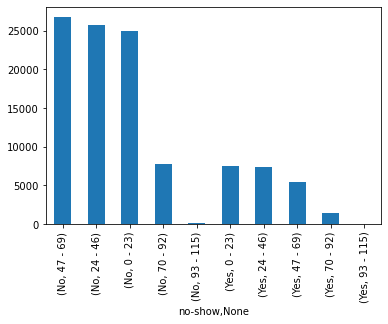

In [22]:
df_updated.groupby('no-show').age_groups.value_counts().plot(kind = 'bar');

> Since number of patients of each age groups differ, we can plot using proportions instead of counting.
>
>> First, I got specific counts for each age group and its correspondoing state of showing or not

In [23]:
counts = df_updated.groupby(['no-show','age_groups']).count()['age']
counts

no-show  age_groups
No       0 - 23        24980
         24 - 46       25700
         47 - 69       26782
         70 - 92        7718
         93 - 115        127
Yes      0 - 23         7506
         24 - 46        7320
         47 - 69        5402
         70 - 92        1423
         93 - 115         29
Name: age, dtype: int64

> Next, I got the whole number of patients in each group.

In [24]:
total = df_updated.groupby('age_groups').count()['age']
total

age_groups
0 - 23      32486
24 - 46     33020
47 - 69     32184
70 - 92      9141
93 - 115      156
Name: age, dtype: int64

> Divided to get the proportions.

In [25]:
decimal = counts / total
decimal

no-show  age_groups
No       0 - 23        0.768947
         24 - 46       0.778316
         47 - 69       0.832153
         70 - 92       0.844328
         93 - 115      0.814103
Yes      0 - 23        0.231053
         24 - 46       0.221684
         47 - 69       0.167847
         70 - 92       0.155672
         93 - 115      0.185897
Name: age, dtype: float64

> Finally, I plotted the proportions.

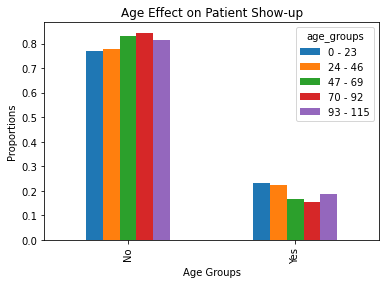

In [26]:
decimal.unstack().plot(kind = 'bar', title = 'Age Effect on Patient Show-up');
plt.xlabel('Age Groups');
plt.ylabel('Proportions');

#### With the info of the no-show column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
> We can see that
>
>> **23.1053%** of patients from ages **0 to 23**
>>
>> 22.1684% of patients from ages 24 to 46
>>
>> 16.7847% of patients from ages 47 to 69
>>
>> **15.5672%** of patients from ages **70 to 92**
>>
>> 18.5897% of patients from ages 93 to 115
>

### Research Question 2 _ Does having a scholarship affect the show-up rate? 

> Let's analyze counts and relations between patients having a scholarship & patients showing up.

In [27]:
df_updated['no-show'].value_counts()

No     88207
Yes    22319
Name: no-show, dtype: int64

In [28]:
df_updated.scholarship.value_counts()

0    99665
1    10861
Name: scholarship, dtype: int64

In [29]:
scholarship = df_updated.groupby('scholarship')['no-show'].value_counts()
scholarship

scholarship  no-show
0            No         79924
             Yes        19741
1            No          8283
             Yes         2578
Name: no-show, dtype: int64

> Let's plot the data for more clarifications.

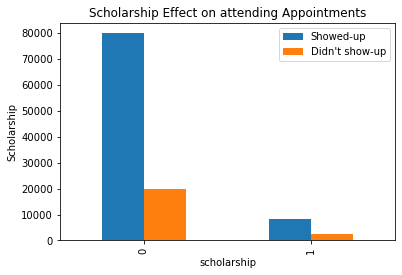

In [30]:
scholarship.unstack().plot(kind = 'bar');
plt.legend(['Showed-up', "Didn't show-up"])
plt.ylabel('Scholarship')
plt.title("Scholarship Effect on attending Appointments");

> As seen above:
>
>> About 80% of patients who don't have a scholarship showed-up.
> 
> Compared to:
>
>> About 77% of patients who have a scholarship showed-up.

### Research Question 3 _ Does sending an SMS message affect the show-up rate? 

> First, let's explore more about sms column.

In [31]:
df_updated.sms_received.value_counts()

0    75044
1    35482
Name: sms_received, dtype: int64

> Since there is just two options for sms recevied, we can separate them.
>
>> **1st Case:** No sms sent.

In [32]:
no_sms = df_updated.query('sms_received == 0')['no-show'].value_counts()
no_sms

No     62509
Yes    12535
Name: no-show, dtype: int64

>> **2nd Case:** SMS message sent.

In [33]:
yes_sms = df_updated.query('sms_received == 1')['no-show'].value_counts()
yes_sms

No     25698
Yes     9784
Name: no-show, dtype: int64

> Finally, we plot the data.

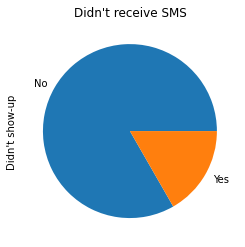

In [34]:
no_sms.plot(kind = 'pie')
plt.title("Didn't receive SMS")
plt.ylabel("Didn't show-up");

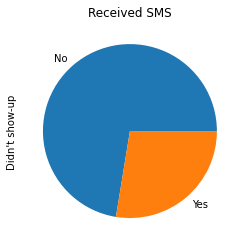

In [35]:
yes_sms.plot(kind = 'pie')
plt.title("Received SMS")
plt.ylabel("Didn't show-up");

> As the graphs show, sending a SMS message does affect whether patients show-up on time or not.

### Research Question 4 _ How does gender affect the no-show rate? 

> First, Let's see number of female patients vs male patients. 

In [36]:
df_updated.gender.value_counts()

F    71839
M    38687
Name: gender, dtype: int64

In [37]:
gender = df_updated.groupby('gender')['no-show'].value_counts()
gender

gender  no-show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: no-show, dtype: int64

> Let's plot them for more clarifications.

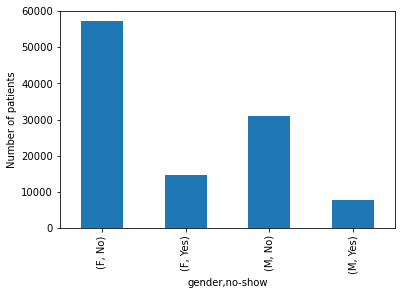

In [38]:
gender.plot(kind = 'bar');
plt.ylabel('Number of patients');

> Since, the patients' gender isn't equal, we need to use proportions/percentages again.

In [39]:
g_propor = df_updated.gender.value_counts() / len(df_updated)
g_propor

F    0.649974
M    0.350026
Name: gender, dtype: float64

> Next, Let's group them with no-show column.

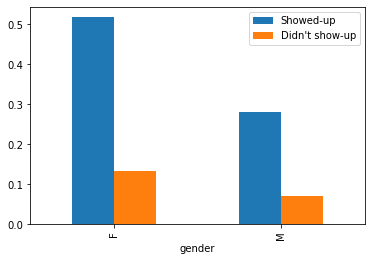

In [40]:
(df_updated.groupby('gender')['no-show'].value_counts() / len(df_updated)).unstack().plot(kind = 'bar')
plt.legend(['Showed-up', "Didn't show-up"]);

In [41]:
df_updated.groupby('gender')['no-show'].value_counts() / len(df_updated)

gender  no-show
F       No         0.517932
        Yes        0.132041
M       No         0.280133
        Yes        0.069893
Name: no-show, dtype: float64

> Since Females made the bigger part of the population, division by total was necessary.
>
>> Graphs shows a difference between men and women when showing-up to appointments.

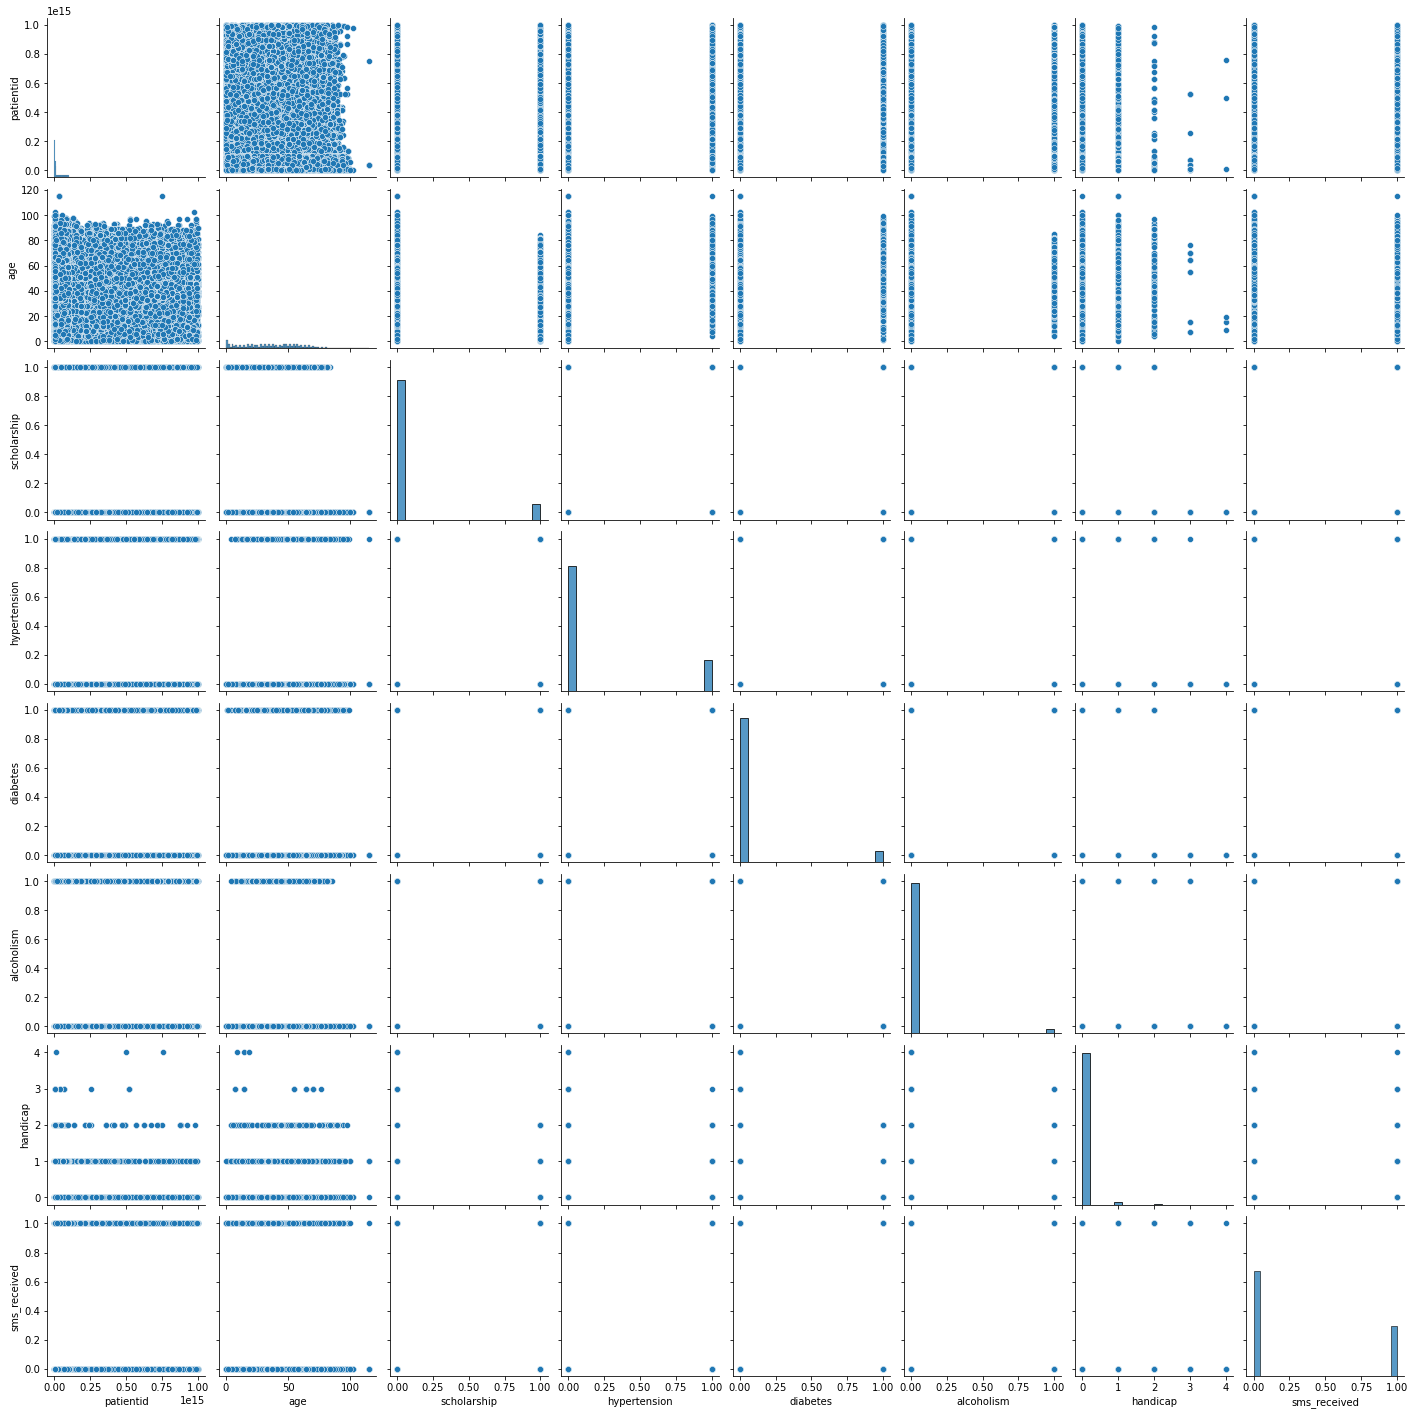

In [42]:
sns.pairplot(df_updated);

<a id='conclusions'></a>
## Conclusions

> 1) Young age groups tend to miss their appointments more than elders.
>
> 2) Sending a SMS message, although may act as reminder, tends to increase the no-show rate amongst patients.
>
>> People who didn't receive a SMS showed-up more.
>
> 3) Having a scholarship doesn't significantly impact show-up rate.
>
> 4) Women tend to show up to appointments more than men.
>> Females care more about their health.
>
> 5) 88,207 patients did show-up to their appointments compared to 22,319 patients which is about 20.2 percent of the population.
>